In [7]:
#Business detail URL-- 'https://api.yelp.com/v3/businesses/{id}'
#Business reviews URL--'https://api.yelp.com/v3/businesses/{id}/reviews'

#Featured event URL -- 'https://api.yelp.com/v3/events/featured'
#Event search URL -- 'https://api.yelp.com/v3/events'
#Event look up URL -- 'https://api.yelp.com/v3/events/{id}'

import json
import pandas as pd



fileJson = 'yelp_dataset/business.json'

#load json file
dat = []
headers = True
with open(fileJson, encoding="cp866") as f:
     for line in f:
         json_object =json.loads(line)
         dat.append(json_object)
         if headers:
             keys =[]
             #Read the Head of the datasets
             for k, v in json_object.items():
                 keys.append(k)

dat = pd.read_json(fileJson, lines=True)



# List all the categories of food/restaurant in Pittsburg, Phoenix and Charlotte
business_food = dat[dat['categories'].str.contains('Restaurant', case=False, na=False)]
city_food = business_food[business_food['city'].str.contains('Pittsburg|Phoenix|Charlotte', case = False, na = False)]


#Create a data frame that gathers all the categories into a individual row
df_explode = city_food.assign(categories = city_food.categories
                         .str.split(', ')).explode('categories')
#List 50 most popular categories for restaurant records in Pittsburg, Phoenix and Charlotte
print(df_explode.categories.value_counts()[:50])
print(df_explode.head(10))

Restaurants                  9170
Food                         2421
Nightlife                    1462
Sandwiches                   1434
Bars                         1407
American (Traditional)       1374
Fast Food                    1308
American (New)               1115
Mexican                      1114
Pizza                        1099
Breakfast & Brunch            939
Burgers                       905
Italian                       697
Coffee & Tea                  554
Chinese                       545
Salad                         528
Event Planning & Services     501
Chicken Wings                 491
Seafood                       426
Delis                         420
Cafes                         396
Caterers                      364
Sports Bars                   313
Sushi Bars                    305
Bakeries                      288
Specialty Food                285
Japanese                      278
Mediterranean                 271
Desserts                      263
Barbeque      

According to the ouput from above, we can find some repetitive categories such as Food, which is relevant to restaurants. I only care about cateogries that describe the types of the food the restaurants server, instead of general categories of the restaurants. Some categories will be screened out.

In [15]:
df_filtered = df_explode[ (df_explode['categories'] != 'Restaurants') & (df_explode['categories'] != 'Food')
                       & (df_explode['categories'] != 'Nightlife') & (df_explode['categories'] != 'Bars')
                       & (df_explode['categories'] != 'Bars') & (df_explode['categories'] != 'Event Planning & Services')
                       & (df_explode['categories'] != 'Caterers') & (df_explode['categories'] != 'Sports Bars')
                       & (df_explode['categories'] != 'Wine Bars') & (df_explode['categories'] != 'Pubs')
                       & (df_explode['categories'] != 'Arts & Entertainment') & (df_explode['categories'] != 'Juice Bars & Smoothies')
                       & (df_explode['categories'] != 'Ice Cream & Frozen Yogurt') & (df_explode['categories'] != 'Cocktail Bars')
                       & (df_explode['categories'] != 'Wine & Spirits') & (df_explode['categories'] != 'Food Delivery Services')]

print(df_filtered.categories.value_counts()[:50])
print(df_filtered.head(10))

Sandwiches                1434
American (Traditional)    1374
Fast Food                 1308
American (New)            1115
Mexican                   1114
Pizza                     1099
Breakfast & Brunch         939
Burgers                    905
Italian                    697
Coffee & Tea               554
Chinese                    545
Salad                      528
Chicken Wings              491
Seafood                    426
Delis                      420
Cafes                      396
Sushi Bars                 305
Bakeries                   288
Specialty Food             285
Japanese                   278
Mediterranean              271
Desserts                   263
Barbeque                   263
Asian Fusion               241
Diners                     222
Food Trucks                211
Beer                       207
Vegetarian                 204
Steakhouses                194
Greek                      185
Southern                   184
Hot Dogs                   168
Tex-Mex 

To get the review of the bussiness from customer, the following step will connect the review.json file with the business file by the business ID.  

In [18]:
review_json= 'yelp_dataset/review.json'

#review is a dataset of 5G with millions of records, it is loaded by chunck instead of individual line
size = 1000000
review = pd.read_json(review_json, lines = True, dtype = {"review_id": str,
                                                         'user_id': str, 
                                                         'business_id': str,
                                                         'stars': int, 
                                                         'date': str, 'text':str,
                                                         'useful': int, 'funny': int,
                                                         'cool': int}, chunksize = size)


#Join review file and business file by using business_id.
#The merge was performed as the unit of chunk.
chunk_list = []
for review_chunk in review:
    #rename colume name to avoid conflict with business overall star rating
    chunk_merged = pd.merge(df_filtered, review_chunk, on = 'business_id', how = 'inner')
    #show feedback on progress 
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
#concatenate all relevant data back to one dataframe
restaurant_review = pd.concat(chunk_list, ignore_index = True, join = 'outer', axis = 0)

    
print(restaurant_review.head(10))

391338 out of 1,000,000 related reviews
367712 out of 1,000,000 related reviews
361638 out of 1,000,000 related reviews
359939 out of 1,000,000 related reviews
380255 out of 1,000,000 related reviews
348078 out of 1,000,000 related reviews
219536 out of 1,000,000 related reviews
              business_id                         name  \
0  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   
1  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   
2  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   
3  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   
4  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   
5  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   
6  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   
7  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   
8  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   
9  gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   

                     address       city state postal_code   latitude  \
0  10110 

The following section will print the top ten popular categories for restaurants in three major cities and the average review for the corresponding categories. 

    Unnamed: 0        city              categories    rating  count
17          17     Phoenix                 Mexican  3.569721    753
15          15     Phoenix               Fast Food  2.726736    677
19          19     Phoenix              Sandwiches  3.512295    610
11          11     Phoenix  American (Traditional)  3.320847    527
12          12     Phoenix      Breakfast & Brunch  3.684783    460
9            9   Charlotte              Sandwiches  3.366150    452
1            1   Charlotte  American (Traditional)  3.322222    451
18          18     Phoenix                   Pizza  3.351230    447
13          13     Phoenix                 Burgers  2.995360    431
5            5   Charlotte               Fast Food  2.706938    418
10          10     Phoenix          American (New)  3.630531    409
21          21  Pittsburgh  American (Traditional)  3.394737    395
28          28  Pittsburgh                   Pizza  3.361757    387
0            0   Charlotte          American (Ne

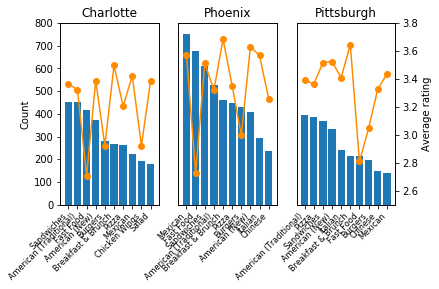

In [4]:
import matplotlib.pyplot as plt
city_food = pd.read_csv('yelp_dataset/popCat_city.csv')
city_food = city_food.sort_values(by = 'count', ascending=False)
city_food_C = city_food[city_food['city'] == 'Charlotte']
city_food_P = city_food[city_food['city'] == 'Phoenix']
city_food_Pg = city_food[city_food['city'] == 'Pittsburgh']
print(city_food)

fig, ax = plt.subplots(ncols = 3, nrows= 1)
ax[0].bar(city_food_C['categories'], city_food_C['count'])
ax[0].set_xticklabels(city_food_C['categories'], rotation=45, ha='right', size = 8)
ax[0].set_ylim([0, 800])
ax[0].set_title("Charlotte")
ax[0].set_ylabel("Count")
ax2 = ax[0].twinx()
ax2.set_ylim([2.5, 3.8])
ax2.plot(ax[0].get_xticks(),city_food_C['rating'], linestyle='-', marker='o', color = 'darkorange')
ax2.yaxis.set_visible(False)


ax[1].bar(city_food_P['categories'], city_food_P['count'])
ax[1].set_xticklabels(city_food_P['categories'], rotation=45, ha='right', size = 8)
ax[1].set_ylim([0, 800])
ax[1].set_title("Phoenix")
ax[1].yaxis.set_visible(False)
ax2_1 = ax[1].twinx()
ax2_1.set_ylim([2.5, 3.8])
ax2_1.plot(ax[1].get_xticks(),city_food_P['rating'], linestyle='-', marker='o', color = 'darkorange')
ax2_1.yaxis.set_visible(False)


ax[2].bar(city_food_Pg['categories'], city_food_Pg['count'])
ax[2].set_xticklabels(city_food_Pg['categories'], rotation=45, ha='right', size = 8)
ax[2].set_ylim([0, 800])
ax[2].set_title("Pittsburgh")
ax[2].yaxis.set_visible(False)
ax2_2 = ax[2].twinx()
ax2_2.set_ylim([2.5, 3.8])
ax2_2.plot(ax[2].get_xticks(),city_food_Pg['rating'], linestyle='-', marker='o', color = 'darkorange')
ax2_2.set_ylabel("Average rating")

plt.gcf().subplots_adjust(bottom=0.25)
plt.show()


The follwing section will create a side-by-side boxplot for the number of vetos as 'useful' by the rating and cities.

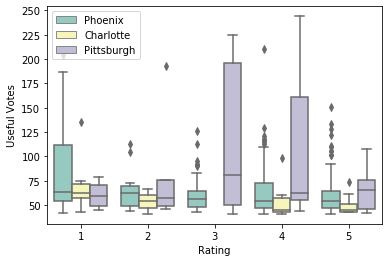

In [24]:
import seaborn as sns


reviews = pd.read_csv('yelp_dataset/restaurant_review.csv', dtype={'review_stars': str})
reviews = reviews.sort_values(by = 'review_stars', ascending=True)
reviews  = reviews [(reviews ['city'] != 'Phoenix Valley') & (reviews ['city'] != 'East Pittsburgh')&
                        (reviews ['city'] != 'charlotte') & (reviews ['city'] != 'PHOENIX') &(reviews['useful'] > 40)]



reviews_C = reviews[reviews['city'] == 'Charlotte']
reviews_P = reviews[reviews['city'] == 'Phoenix']
reviews_Pg = reviews[reviews['city'] == 'Pittsburgh']


ax = sns.boxplot(x="review_stars", y="useful", hue = 'city', data=reviews, palette="Set3")
ax.set(xlabel='Rating', ylabel='Useful Votes')
plt.legend(loc='upper left')
plt.show()



The following section will create a scatterplot of number of votes as 'useful' vs. number of votes as 'funny'

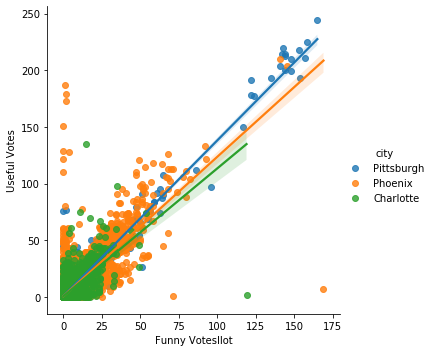

In [25]:
reviews = pd.read_csv('yelp_dataset/restaurant_review.csv')
reviews = reviews.sort_values(by = 'review_stars', ascending=True)
reviews  = reviews [(reviews ['city'] != 'Phoenix Valley') & (reviews ['city'] != 'East Pittsburgh')&
                        (reviews ['city'] != 'charlotte') & (reviews ['city'] != 'PHOENIX') ]


ax = sns.lmplot(x = 'funny', y = 'useful', hue = 'city', data = reviews)
ax.set(xlabel='Funny Votesllot', ylabel='Useful Votes')
plt.show()